# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics :
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR :
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies :
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\HR.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
#value counts for each column

for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5    

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.shape

(1470, 35)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

df['Department'] = le.fit_transform(df['Department'])

df['EducationField'] = le.fit_transform(df['EducationField'])

df['Gender'] = le.fit_transform(df['Gender'])

df['JobRole'] = le.fit_transform(df['JobRole'])

df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

df['Over18'] = le.fit_transform(df['Over18'])

df['OverTime'] = le.fit_transform(df['OverTime'])

df['Attrition'] = le.fit_transform(df['Attrition'])

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Correlation :

In [10]:
df.corr().sum()

Age                         3.847120
Attrition                  -0.170415
BusinessTravel              0.951096
DailyRate                   0.943977
Department                  1.992375
DistanceFromHome            1.247563
Education                   1.840439
EducationField              0.907268
EmployeeCount               0.000000
EmployeeNumber              0.872763
EnvironmentSatisfaction     0.943528
Gender                      0.486261
HourlyRate                  0.898595
JobInvolvement              0.931770
JobLevel                    4.833102
JobRole                     1.054926
JobSatisfaction             0.672697
MaritalStatus               0.007113
MonthlyIncome               4.686087
MonthlyRate                 1.024704
NumCompaniesWorked          1.470608
Over18                      0.000000
OverTime                    1.220890
PercentSalaryHike           1.512749
PerformanceRating           1.600247
RelationshipSatisfaction    1.046233
StandardHours               0.000000
S

<AxesSubplot:>

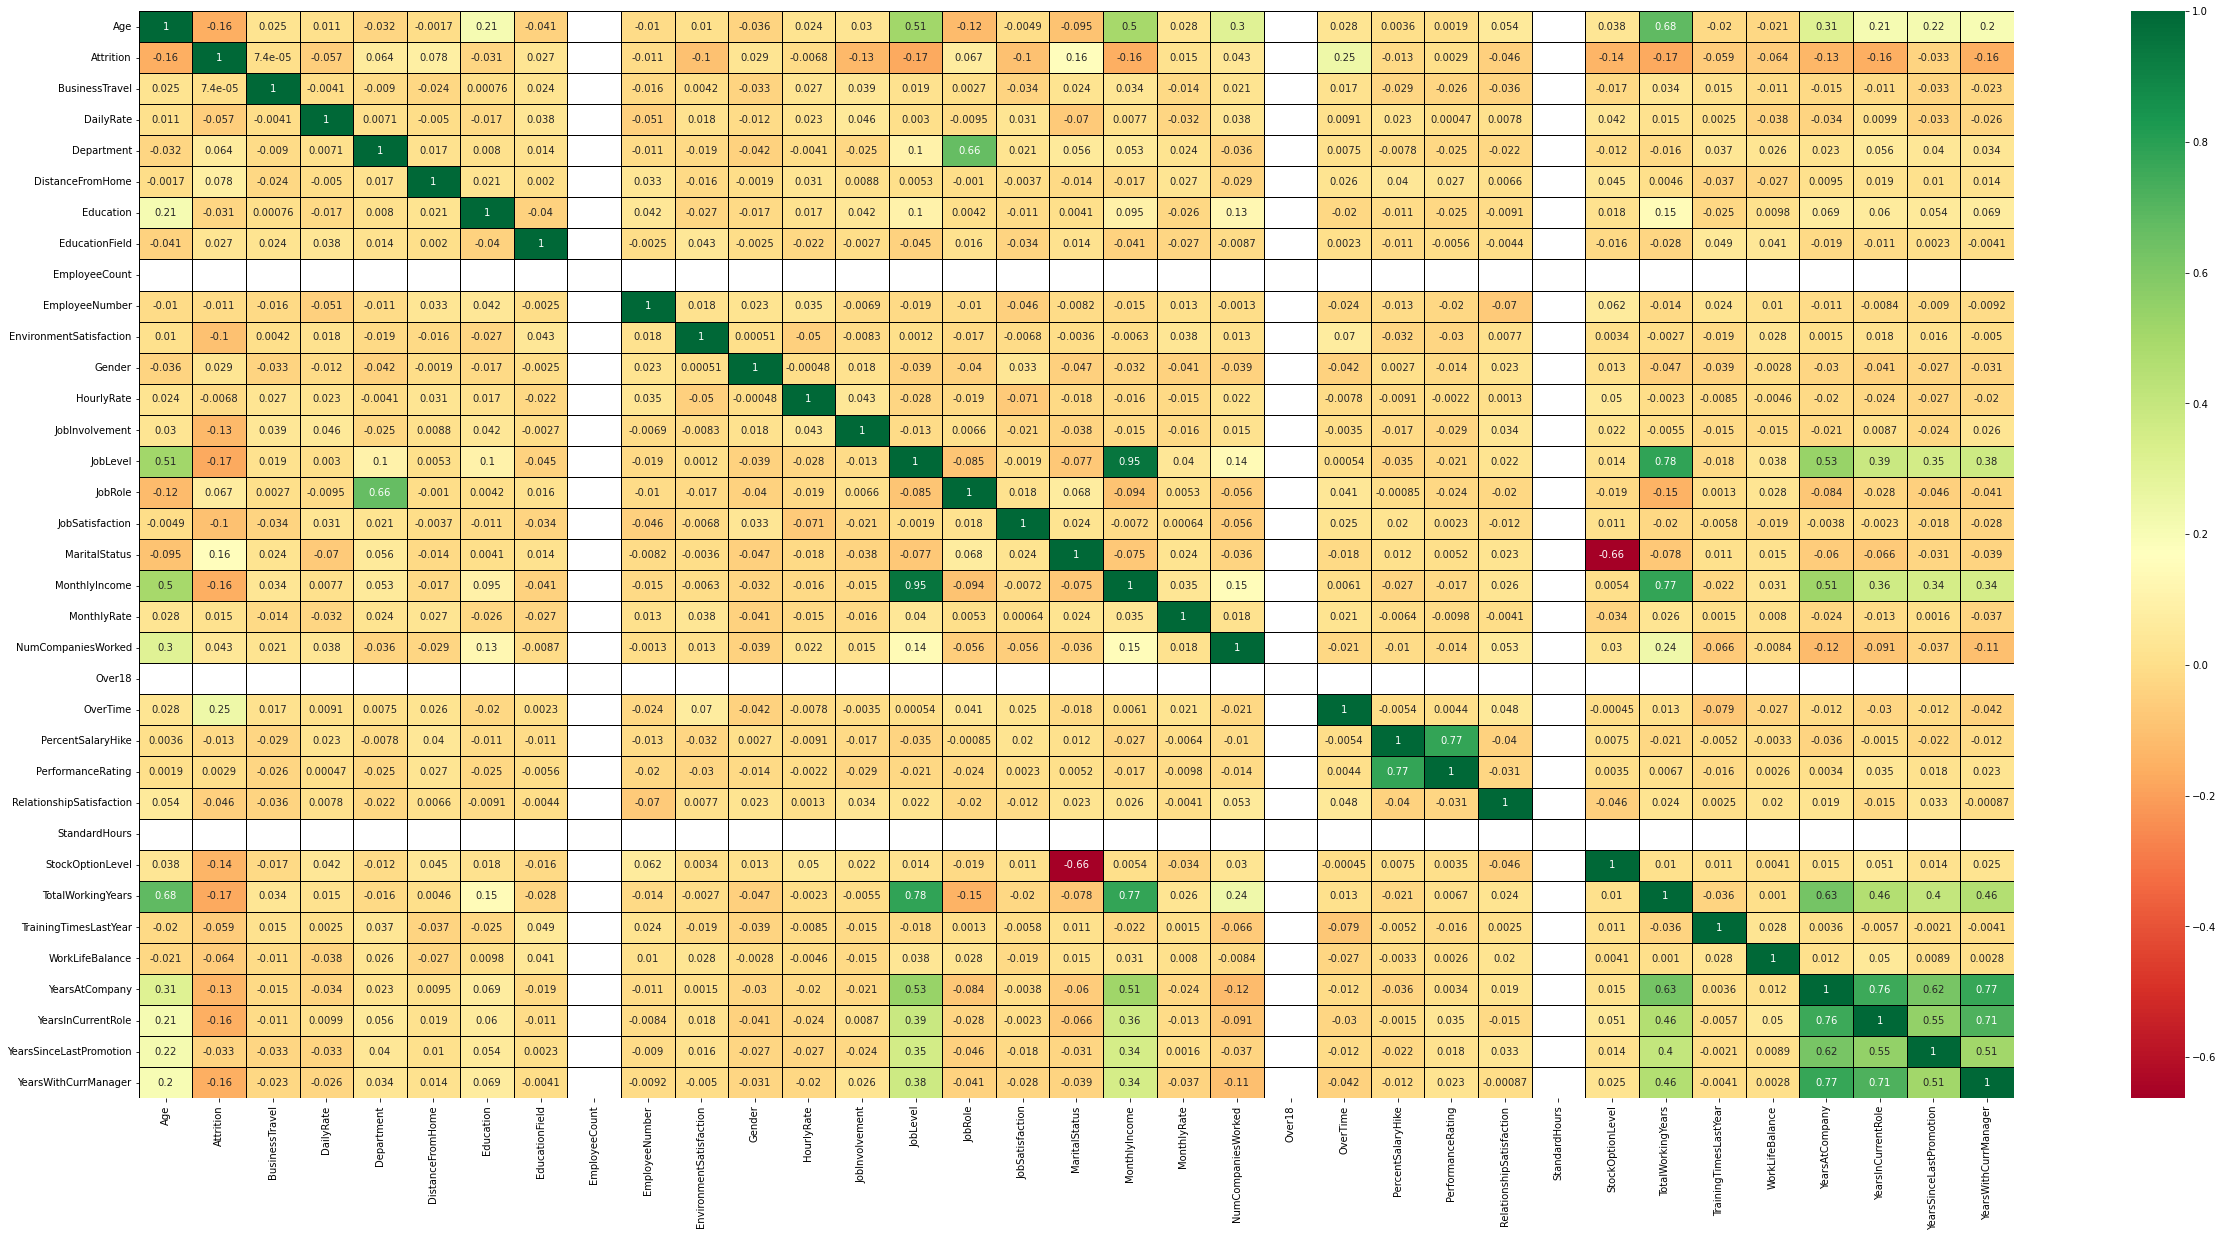

In [11]:
plt.figure(figsize=(42,20))
sns.heatmap(df.corr(), annot= True, linewidth = 0.5, linecolor ='black', cmap ='RdYlGn')

In [12]:
df.drop(['StandardHours', 'EmployeeCount', 'Over18'], axis = 1, inplace = True)

In [13]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Age                            AxesSubplot(0.125,0.816017;0.110714x0.0639831)
Attrition                   AxesSubplot(0.257857,0.816017;0.110714x0.0639831)
BusinessTravel              AxesSubplot(0.390714,0.816017;0.110714x0.0639831)
DailyRate                   AxesSubplot(0.523571,0.816017;0.110714x0.0639831)
Department                  AxesSubplot(0.656429,0.816017;0.110714x0.0639831)
DistanceFromHome            AxesSubplot(0.789286,0.816017;0.110714x0.0639831)
Education                      AxesSubplot(0.125,0.739237;0.110714x0.0639831)
EducationField              AxesSubplot(0.257857,0.739237;0.110714x0.0639831)
EmployeeNumber              AxesSubplot(0.390714,0.739237;0.110714x0.0639831)
EnvironmentSatisfaction     AxesSubplot(0.523571,0.739237;0.110714x0.0639831)
Gender                      AxesSubplot(0.656429,0.739237;0.110714x0.0639831)
HourlyRate                  AxesSubplot(0.789286,0.739237;0.110714x0.0639831)
JobInvolvement                 AxesSubplot(0.125,0.662458;0.1107

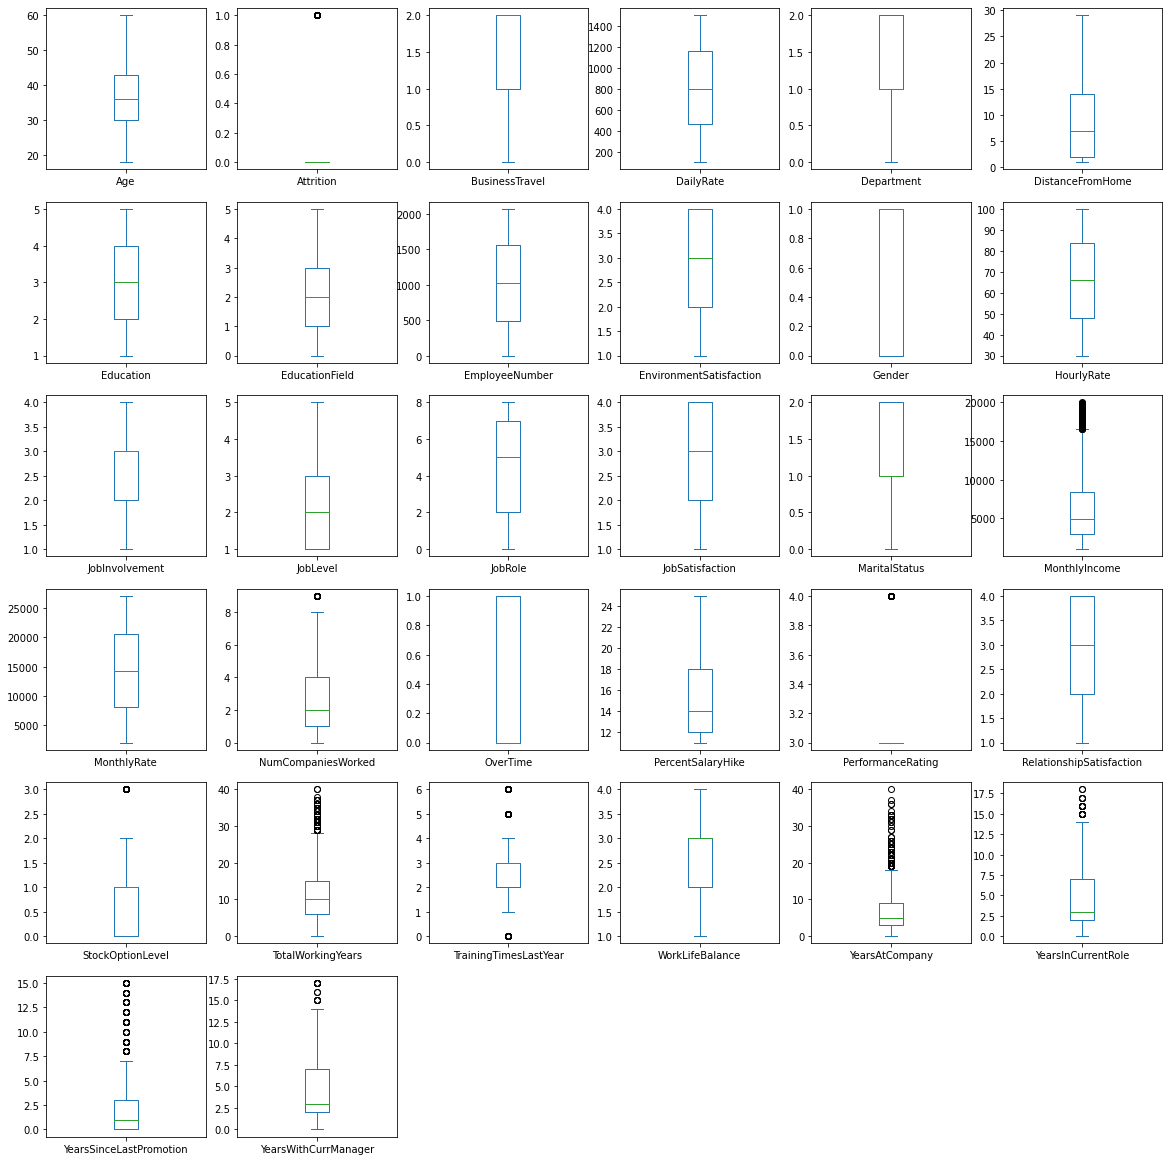

In [14]:
df.plot(kind='box', subplots=True, layout=(10,6),figsize=(20,35))

#layout(nrows, ncolumns)

In [15]:
#Removing outliers using z score

from scipy.stats import zscore
z = pd.DataFrame(zscore(df))
z.fillna(0, inplace=True)
z = np.abs(z<3).all(axis=1)
df1 = df[z]

In [16]:
print(df1.shape)
print(df.shape)

(1387, 32)
(1470, 32)


In [17]:
loss = ((1470-1387)/1470)*100
print(loss)

5.646258503401361


# Skewness

In [18]:
df1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

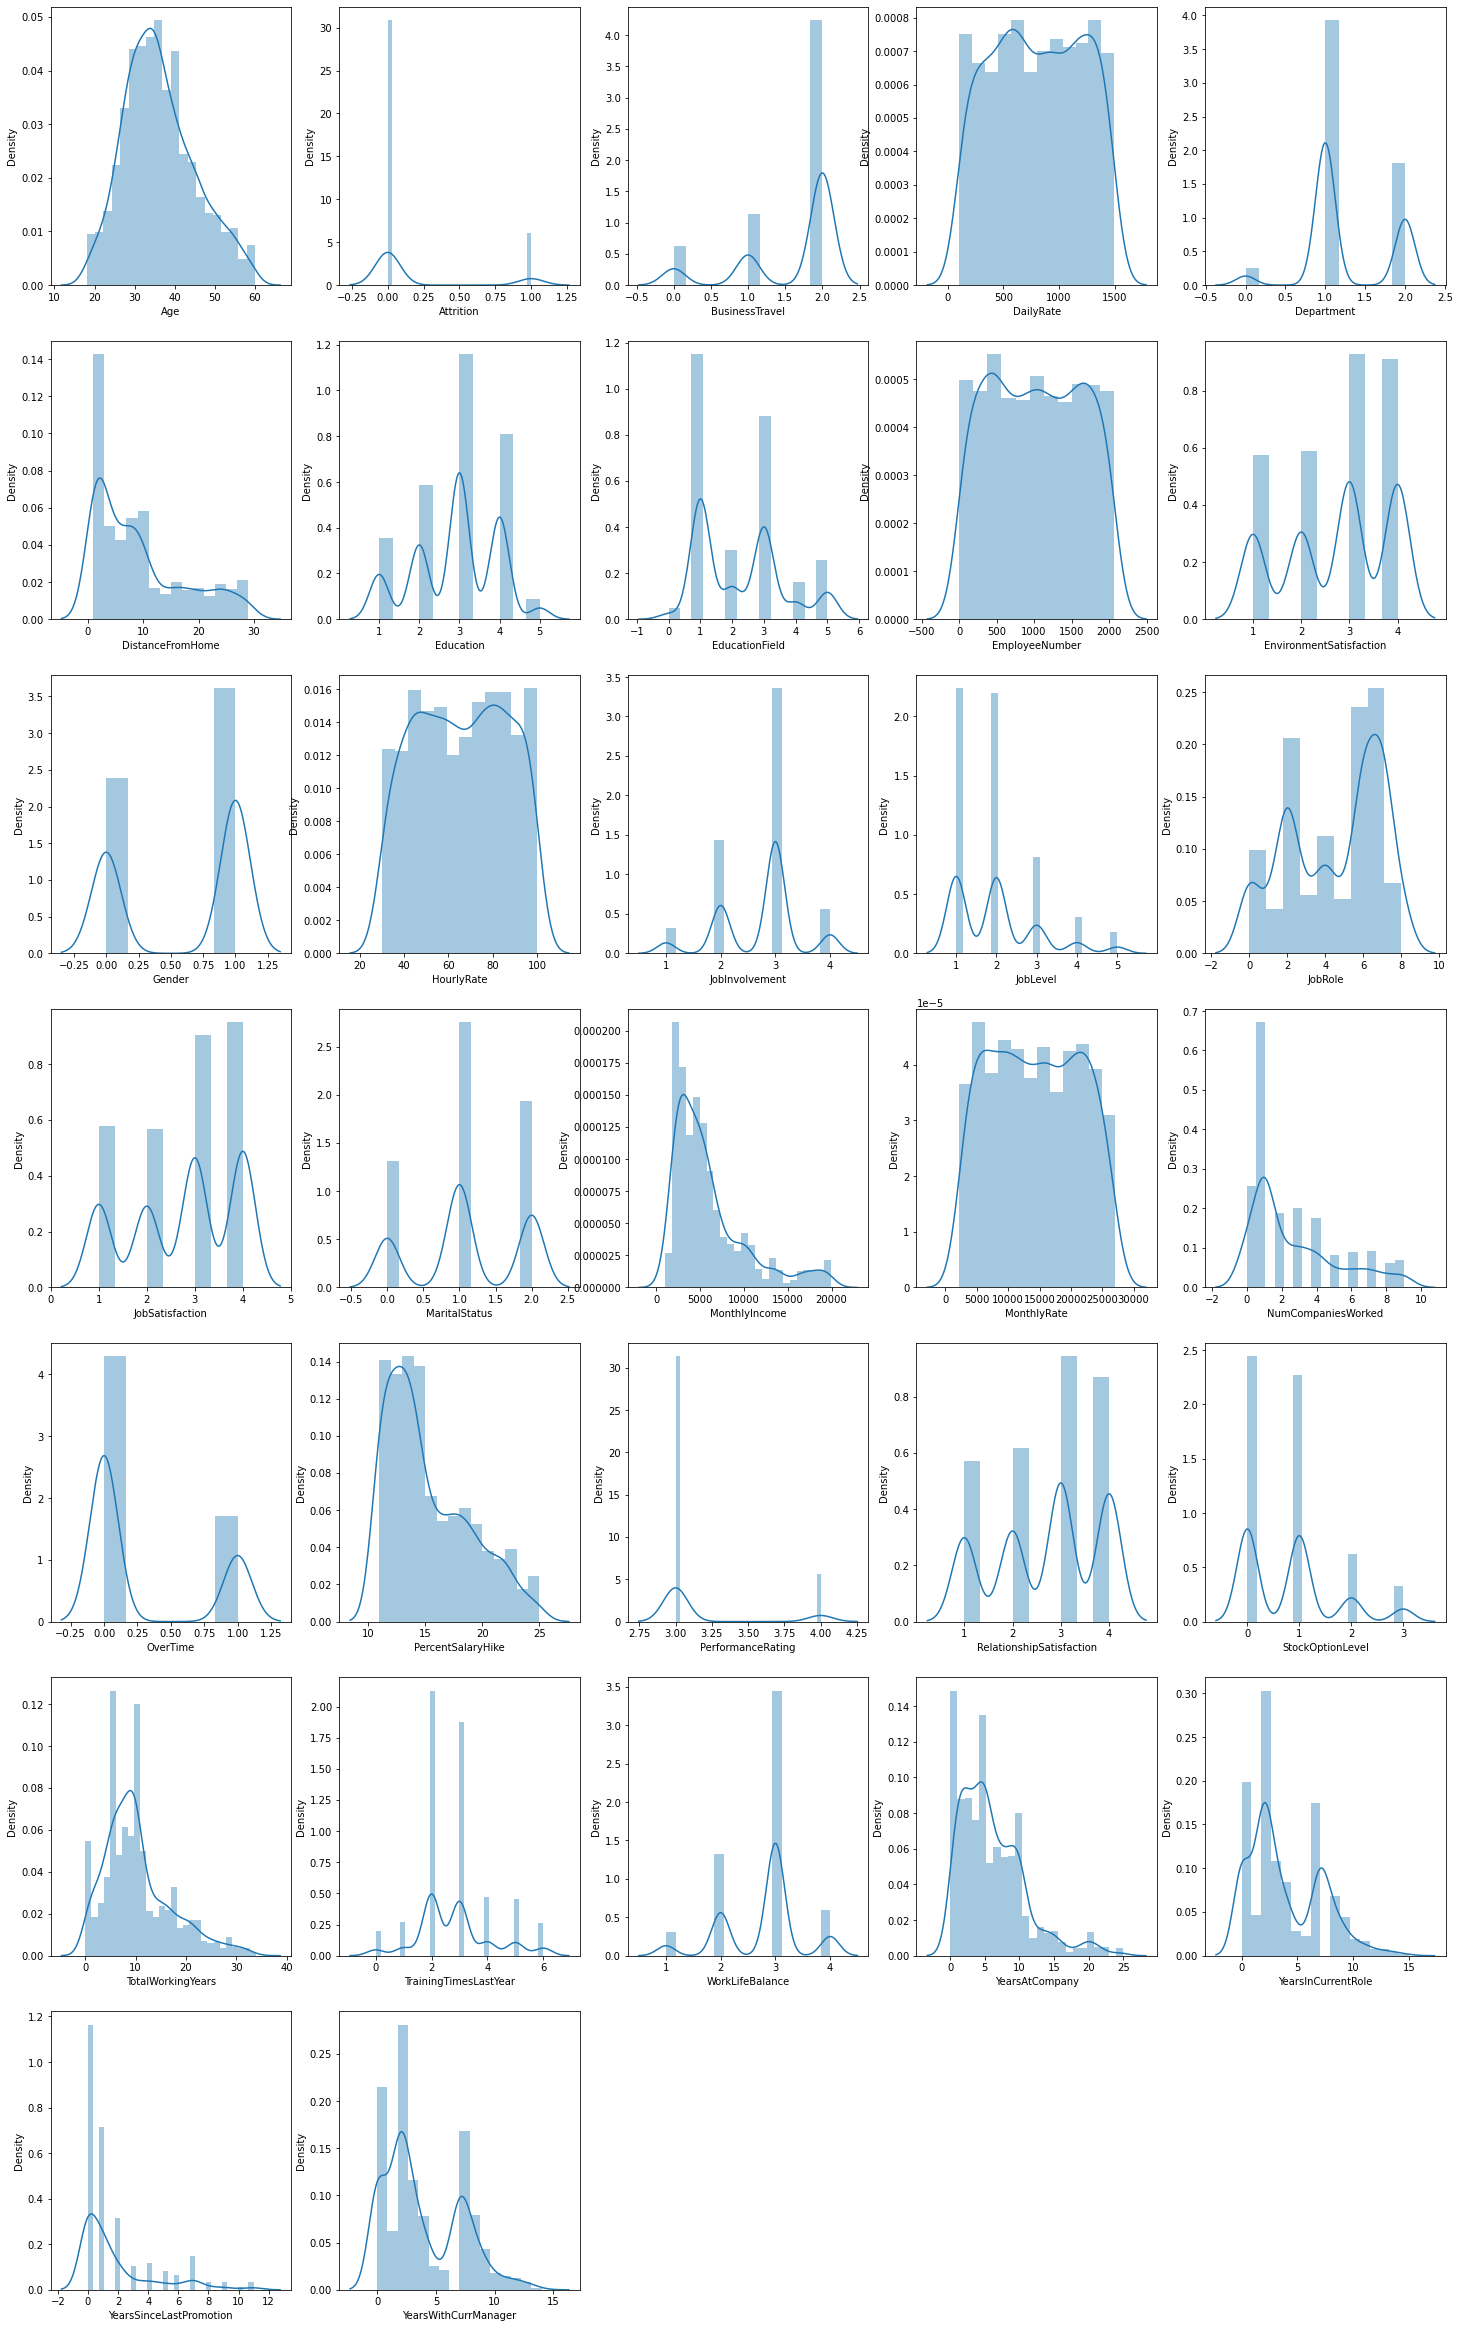

In [19]:
plt.figure(figsize=(25,42))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(7,5,i)
    sns.distplot(df1[column])

In [20]:
X = df1.drop(['Attrition'], axis=1)
Y = df1['Attrition']

In [21]:
from sklearn.preprocessing import power_transform
X = power_transform(df1, method ='yeo-johnson')
X

array([[ 0.61013332,  2.24872599,  0.63872976, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -0.44469624, -1.38077628, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  2.24872599,  0.63872976, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 , -0.44469624,  0.63872976, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -0.44469624, -1.38077628, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603, -0.44469624,  0.63872976, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df1)
X

array([[ 0.5366811 ,  2.24872599,  0.59312579, ...,  0.04090327,
        -0.71069889,  0.36826963],
       [ 1.44211114, -0.44469624, -0.90535412, ...,  0.96589518,
        -0.31047991,  0.9821999 ],
       [ 0.08396607,  2.24872599,  0.59312579, ..., -1.19241928,
        -0.71069889, -1.16655603],
       ...,
       [-1.04782149, -0.44469624,  0.59312579, ..., -0.575758  ,
        -0.71069889, -0.24566063],
       [ 1.44211114, -0.44469624, -0.90535412, ...,  0.65756454,
        -0.71069889,  1.28916503],
       [-0.2555702 , -0.44469624,  0.59312579, ..., -0.26742737,
        -0.31047991, -0.55262577]])

In [23]:
df1 = pd.DataFrame(df)

In [24]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [26]:
X = pd.DataFrame(X)

# Train Test Split :

In [27]:
X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.536681,2.248726,0.593126,0.734325,1.405373,-1.011249,-0.876177,-0.940815,-1.702014,-0.665328,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270
1,1.442111,-0.444696,-0.905354,-1.307769,-0.496337,-0.145521,-1.853858,-0.940815,-1.700354,0.251978,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200
2,0.083966,2.248726,0.593126,1.406752,-0.496337,-0.887573,-0.876177,1.305159,-1.697034,1.169285,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556
3,-0.368749,-0.444696,-0.905354,1.453896,-0.496337,-0.763898,1.079185,-0.940815,-1.695374,1.169285,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556
4,-1.047821,-0.444696,0.593126,-0.533609,-0.496337,-0.887573,-1.853858,0.556501,-1.692054,-1.582635,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-0.595106,2.248726,-0.905354,-0.608048,-0.496337,-0.763898,0.101504,-0.940815,0.847759,1.169285,...,-0.424765,-1.575817,-0.929427,-0.493039,-0.622559,-2.501172,0.191440,-0.575758,2.090834,0.982200
2312,-1.387358,2.248726,-0.905354,1.193361,-0.496337,-0.269197,0.101504,-0.940815,-0.629648,-1.582635,...,-0.424765,1.199034,0.238250,-0.642351,0.926301,0.336558,-0.022350,-0.267427,-0.310480,-0.552626
2313,-1.274179,2.248726,0.593126,-1.404539,1.405373,-0.516547,0.101504,-0.192157,-1.467953,0.251978,...,-0.424765,1.199034,-0.929427,-0.642351,-1.396990,0.336558,-0.022350,0.040903,-0.710699,-0.245661
2314,-1.613715,2.248726,-0.905354,1.394345,-0.496337,-0.640223,-1.853858,2.053817,-0.719289,0.251978,...,-0.424765,0.274084,-0.929427,-0.940973,0.151871,0.336558,-0.877513,-0.575758,-0.310480,-0.552626


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=None)
cvs.mean()

[[232   0]
 [  0 232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       232

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464

1.0


1.0

In [31]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv=None)
cvs.mean()

[[232   0]
 [  0 232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       232

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464

1.0


1.0

In [32]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X, Y, cv=10)
cvs.mean()

[[232   0]
 [  0 232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       232

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464

1.0


1.0

In [33]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X, Y, cv=None)
cvs.mean()

[[232   0]
 [  0 232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       232

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464

1.0


1.0

In [34]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv=None)
cvs.mean()

[[231   1]
 [  5 227]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       232
           1       1.00      0.98      0.99       232

    accuracy                           0.99       464
   macro avg       0.99      0.99      0.99       464
weighted avg       0.99      0.99      0.99       464

0.9870689655172413


0.984454829820511

# HyperParameter Tuning :

# RandomizedSearchCV :

In [35]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors=[2,5,6,9,11,3]
weights = ['uniform', 'distance']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10,20,30,45]
metric = ['minkowski','euclidean','manhattan']
n_jobs = [15,25,40,60]

random_grid = {'n_neighbors': n_neighbors,
               'weights' : weights,
               'algorithm' : algorithm,
               'leaf_size' : leaf_size,
               'metric' :  metric,
               'n_jobs' : n_jobs}
print(random_grid)

{'n_neighbors': [2, 5, 6, 9, 11, 3], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 20, 30, 45], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'n_jobs': [15, 25, 40, 60]}


In [36]:
knn = KNeighborsClassifier()
rs = RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = knn,
                          param_distributions= random_grid, 
                          n_iter =100,
                          cv = 3,
                          n_jobs=-1)

In [37]:
rscv.fit(X_train,Y_train)
rscv

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 45],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_jobs': [15, 25, 40, 60],
                                        'n_neighbors': [2, 5, 6, 9, 11, 3],
                                        'weights': ['uniform', 'distance']})

In [38]:
rscv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='euclidean',
                     n_jobs=40, n_neighbors=11, weights='distance')

In [39]:
best_rscv = rscv.best_estimator_
pred = best_rscv.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rscv, X, Y, cv=None)
cvs.mean()

[[231   1]
 [  0 232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       232

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464

0.9978448275862069


0.9930941386758025

# GridSearchCV :

In [40]:
from sklearn.model_selection import GridSearchCV

gridcv_grid = {"n_neighbors" :[rscv.best_params_['n_neighbors'],
                                rscv.best_params_['n_neighbors']+2,
                                rscv.best_params_['n_neighbors']+4,
                                rscv.best_params_['n_neighbors']+6],
               
               "weights" : [rscv.best_params_['weights']],
               
               "algorithm" :[rscv.best_params_['algorithm']],
               
               "leaf_size" :  [rscv.best_params_['leaf_size'],
                                       rscv.best_params_['leaf_size']+2,
                                       rscv.best_params_['leaf_size']+4,
                                       rscv.best_params_['leaf_size']+6],
               
               "n_jobs" : [rscv.best_params_['n_jobs'],
                                     rscv.best_params_['n_jobs']+2,
                                     rscv.best_params_['n_jobs']+4,
                                     rscv.best_params_['n_jobs']+6],
               
               "metric" :[rscv.best_params_['metric']]}

print(gridcv_grid)

{'n_neighbors': [11, 13, 15, 17], 'weights': ['distance'], 'algorithm': ['ball_tree'], 'leaf_size': [10, 12, 14, 16], 'n_jobs': [40, 42, 44, 46], 'metric': ['euclidean']}


In [41]:
knn = KNeighborsClassifier()
gridcv = GridSearchCV(estimator = knn,
                     param_grid = gridcv_grid,
                     cv = 3,
                     verbose = 5,
                     n_jobs = -1)

gridcv.fit(X_train,Y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'],
                         'leaf_size': [10, 12, 14, 16], 'metric': ['euclidean'],
                         'n_jobs': [40, 42, 44, 46],
                         'n_neighbors': [11, 13, 15, 17],
                         'weights': ['distance']},
             verbose=5)

In [42]:
gridcv.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'euclidean',
 'n_jobs': 40,
 'n_neighbors': 17,
 'weights': 'distance'}

In [43]:
gridcv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='euclidean',
                     n_jobs=40, n_neighbors=17, weights='distance')

In [44]:
best_grid = gridcv.best_estimator_
predg = best_grid.predict(X_test)

print(confusion_matrix(Y_test, predg))
print(classification_report(Y_test, predg))
print(accuracy_score(Y_test, predg))
cvs = cross_val_score(gridcv, X, Y, cv=10)
cvs.mean()

[[232   0]
 [  0 232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       232

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464

1.0
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits


0.9930903866248695

# Stratified K- fold cross validation :

In [45]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10)
skf.split(X,Y)

<generator object _BaseKFold.split at 0x0000025B25107B30>

In [46]:
accuracy= []

skf = StratifiedKFold(n_splits=10, random_state = None)
skf.get_n_splits(X,Y)

#X is the feature set and Y is the target
#Putiing train_index and test_index of X and Y

for train_index, test_index in skf.split(X,Y):
    print('Train:', train_index, 'Validation:', test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    Y1_train, Y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
rscv.fit(X1_train, Y1_train)
pred = rscv.predict(X1_test)
score = accuracy_score(pred, Y1_test)
accuracy.append(score)

Train: [ 140  141  142 ... 2313 2314 2315] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 160 166 170 178
 190 191 196 200 202 203 214 218 220 222 233 242 247 253 267 269 274 277
 298 304 307 316 337 343 346 348 350 358 362 365 383 391 392 398 399 410
 411 414 415 418 427 431 437 442 450 451 453 466 475 484 485 496 499 510
 517 531 535 537 542 553 557 559 564 573 574 580 599 608 618 622 624 625
 628 629 631 644 648 649 653 655 660 665 668 670 678 683 689 690]
Tra

In [47]:
np.array(accuracy).mean()

0.9956709956709957

In [48]:
import pickle
filename = 'HR Attrition.pkl'
pickle.dump(knn, open(filename, 'wb'))